In [26]:
# 1. Imports & Setup
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Optional: pretty display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load Data (Choose your file type)
# For Parquet:
df = duckdb.query("SELECT * FROM 'scraped_data_transformed.parquet'").to_df()

# For CSV, use:
# df = duckdb.query("SELECT * FROM 'scraped_data_transformed.csv'").to_df()

print(f"Data shape: {df.shape}")
display(df.head())


Data shape: (112, 56)


,application,brand_name,capacity,category,closure,color,company_name,condition,currency,delivery_time,design,fob_port,fabric_type,feature,gstin,gender,grade,main_domestic_market,main_export_market(s),material,minimum_order_quantity,minimum_ordered_packs,mop,moq,occasion,packaging_details,packsize,pattern,payment_terms,plastic_type,price,price_type,product_link,product_name,product_type,product_unit,returnable,sample_available,sample_policy,season,shape,size,stock_quantity,style,supply_ability,surface_materials,type,unit_type,usage,volume_(l),weight,work_type,is_stainless,product_name_clean,capacity_liters,row_num
0,None,P-SQUARE TECHNOLOGIES,None,Water Storage Tanks,None,None,P-SQUARE TECHNOLOGIES,None,INR,3-2 Week,None,None,None,None,0%,None,None,All India,Australia Eastern Europe Middle East Africa Ce...,Steel,1,1,1,1,None,None,1,None,None,None,20000.00 INR (Approx.),fixed,https://www.tradeindia.com/products/steel-stor...,"Steel Storage Vessel - Stainless Steel 304, 10...",None,10 Piece/Pieces,False,<NA>,None,None,None,None,55,None,1 Per Week,None,None,Piece/Pieces,None,None,None,None,True,steel storage vessel stainless steel 304 10 t...,NaN,1
1,None,LABH PROJECTS PVT. LTD.,None,Water Storage Tanks,None,None,LABH PROJECTS PVT. LTD.,None,INR,30 Days,None,india,None,None,0%,None,None,All India,Western Europe Australia North America Eastern...,None,1,1,1,1,None,Sea Worthy Wooden Export Packing,1,None,Letter of Credit (L/C) Letter of Credit at Sig...,None,1500000.00 INR (Approx.),fixed,https://www.tradeindia.com/products/stainless-...,Stainless steel vertical & horizontal storage ...,None,1 Piece/Pieces,False,<NA>,Contact us for information regarding our sampl...,None,None,None,15,None,None,None,None,Piece/Pieces,None,None,None,None,True,stainless steel vertical horizontal storage t...,NaN,2
2,None,None,None,Water Storage Tanks,None,None,CRYSTAL IMPEX,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,None,None,None,None,https://www.tradeindia.com/products/nexlin-sto...,Nexlin storage waste water tank,None,None,<NA>,<NA>,None,None,None,None,<NA>,None,None,None,None,None,None,None,None,None,False,nexlin storage waste water tank,NaN,3
3,None,THE BOMBAY ENGINEERING WORKS,500 liters,Water Storage Tanks,None,Silver,THE BOMBAY ENGINEERING WORKS,None,INR,None,None,None,None,None,0%,None,None,None,None,Stainless Steel,1,1,1,1,None,None,1,None,None,None,100000.00 INR (Approx.),fixed,https://www.tradeindia.com/products/dm-water-s...,DM Water Storage Tank - High-Density Polyethyl...,None,2,False,<NA>,None,None,None,None,25,None,None,None,Vertical Tank Other,None,None,None,None,None,True,dm water storage tank highdensity polyethylen...,500.0,4
4,None,Sintex,None,Water Storage Tanks,None,Black,DARSHIT TRADING COMPANY,None,INR,None,None,None,None,None,0%,None,None,All India,None,Plastic,60,60,60,60,None,None,1,None,Cash Advance (CA) Cash in Advance (CID),LLDPE,4250.00 INR (Approx.),fixed,https://www.tradeindia.com/products/sintex-bla...,Plastic Sintex Black Double Wall Water Storage...,None,60 Unit/Units,False,<NA>,None,None,Cylindrical,None,180,None,None,None,None,Unit/Units,None,500 to 25000 Liter (L),None,None,False,plastic sintex black double wall water storage...,NaN,5


In [27]:
print("\n=== Data Types ===")
print(df.dtypes)
print("\n=== Info ===")
df.info()

print("\n=== Nulls by Column ===")
display(df.isnull().sum())

print("\n=== Numeric Description ===")
display(df.describe())

print("\n=== Categorical Description ===")
display(df.describe(include='object').T)



=== Data Types ===
application                object
brand_name                 object
capacity                   object
category                   object
closure                    object
color                      object
company_name               object
condition                  object
currency                   object
delivery_time              object
design                     object
fob_port                   object
fabric_type                object
feature                    object
gstin                      object
gender                     object
grade                      object
main_domestic_market       object
main_export_market(s)      object
material                   object
minimum_order_quantity      Int64
minimum_ordered_packs       Int64
mop                         Int64
moq                         Int64
occasion                   object
packaging_details          object
packsize                    Int64
pattern                    object
payment_terms              o

application               101
brand_name                 78
capacity                  103
category                    0
closure                   104
color                      37
company_name                0
condition                  98
currency                   74
delivery_time              27
design                    104
fob_port                  103
fabric_type                98
feature                   100
gstin                      74
gender                    102
grade                      96
main_domestic_market       36
main_export_market(s)      90
material                   48
minimum_order_quantity     74
minimum_ordered_packs      74
mop                        74
moq                        74
occasion                   92
packaging_details          95
packsize                   85
pattern                    81
payment_terms              52
plastic_type              101
price                      74
price_type                 74
product_link                0
product_na


=== Numeric Description ===


,minimum_order_quantity,minimum_ordered_packs,mop,moq,packsize,stock_quantity,capacity_liters,row_num
count,38.0,38.0,38.0,38.0,27.0,38.0,8.000000,112.000000
mean,36.815789,36.815789,36.815789,36.815789,19.481481,374.526316,17281.250000,56.500000
std,84.440561,84.440561,84.440561,84.440561,96.032595,1614.457113,28880.120913,32.475632
min,1.0,1.0,1.0,1.0,1.0,5.0,250.000000,1.000000
25%,1.0,1.0,1.0,1.0,1.0,10.0,500.000000,28.750000
50%,1.0,1.0,1.0,1.0,1.0,22.5,1000.000000,56.500000
75%,45.25,45.25,45.25,45.25,1.0,200.0,20000.000000,84.250000
max,500.0,500.0,500.0,500.0,500.0,10000.0,75000.000000,112.000000



=== Categorical Description ===


,count,unique,top,freq
application,11,5,Industrial,5
brand_name,34,34,P-SQUARE TECHNOLOGIES,1
capacity,9,9,500 liters,1
category,112,2,Water Storage Tanks,56
closure,8,4,Other,3
color,75,32,Silver,12
company_name,112,112,P-SQUARE TECHNOLOGIES,1
condition,14,2,NEW,12
currency,38,1,INR,38
delivery_time,85,27,7 Days,20


In [28]:
print(f"Duplicate rows: {df.duplicated().sum()}")

# Example: unknown brands
if 'brand' in df.columns:
    print("Unknown brands:", (df['brand'].astype(str).str.lower() == 'unknown').sum())

# Columns with many nulls
print("\nColumns with >50% nulls:")
print(df.isnull().mean()[df.isnull().mean() > 0.5])


Duplicate rows: 0

Columns with >50% nulls:
application               0.901786
brand_name                0.696429
capacity                  0.919643
closure                   0.928571
condition                 0.875000
currency                  0.660714
design                    0.928571
fob_port                  0.919643
fabric_type               0.875000
feature                   0.892857
gstin                     0.660714
gender                    0.910714
grade                     0.857143
main_export_market(s)     0.803571
minimum_order_quantity    0.660714
minimum_ordered_packs     0.660714
mop                       0.660714
moq                       0.660714
occasion                  0.821429
packaging_details         0.848214
packsize                  0.758929
pattern                   0.723214
plastic_type              0.901786
price                     0.660714
price_type                0.660714
product_type              0.553571
product_unit              0.660714
returnable 

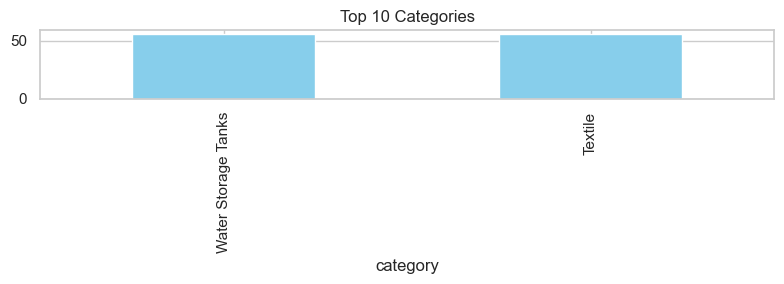

category
Water Storage Tanks    56
Textile                56
Name: count, dtype: int64

Most frequent product names:
product_name_clean
stainless steel water storage tank  color silver                                                                                               3
steel storage vessel  stainless steel 304 10 ton capacity silver color  durable leakagefree easy to clean and maintain                         1
nexlin storage waste water tank                                                                                                                1
dm water storage tank  highdensity polyethylene 2000 liters capacity  uv resistant corrosionresistant design easy installation                 1
plastic sintex black double wall water storage tank                                                                                            1
stainless steel vertical  horizontal storage tank for ro water                                                                             

In [29]:
if 'brand' in df.columns:
    plt.figure(figsize=(10,4))
    df['brand'].value_counts().head(10).plot(kind='bar', color='cornflowerblue')
    plt.title("Top 10 Brands")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(df['brand'].value_counts().head(10))

if 'category' in df.columns:
    plt.figure(figsize=(8,3))
    df['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Categories")
    plt.tight_layout()
    plt.show()
    print(df['category'].value_counts().head(10))

if 'product_name_clean' in df.columns:
    print("\nMost frequent product names:")
    print(df['product_name_clean'].value_counts().head(10))


In [30]:
if 'location' in df.columns:
    plt.figure(figsize=(10,4))
    df['location'].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title("Top Supplier Locations")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(df['location'].value_counts().head(10))

# Regional breakdown by brand (heatmap)
if {'location', 'brand'}.issubset(df.columns):
    pivot = pd.crosstab(df['location'], df['brand'])
    top_locations = df['location'].value_counts().head(10).index
    top_brands = df['brand'].value_counts().head(10).index
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot.loc[top_locations, top_brands], annot=True, fmt="d", cmap="Blues")
    plt.title("Brand Distribution by Top Locations")
    plt.show()


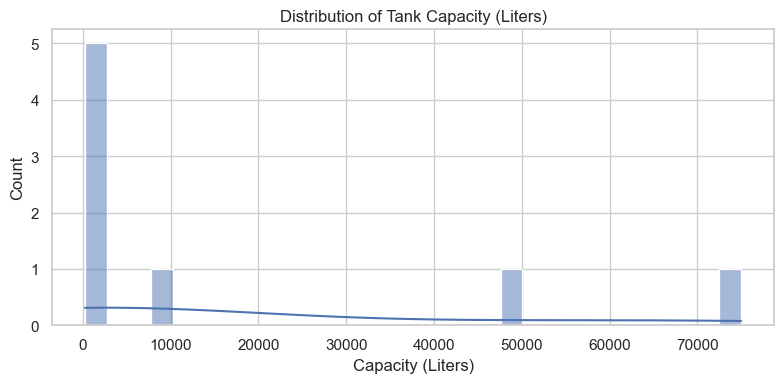

In [31]:
if 'capacity_liters' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['capacity_liters'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Tank Capacity (Liters)")
    plt.xlabel("Capacity (Liters)")
    plt.tight_layout()
    plt.show()



Most common keywords in product names:
saree: 43
color: 35
silk: 19
steel: 16
plastic: 15
design: 14
stainless: 13
sarees: 13
capacity: 10
material: 10
ladies: 10
silver: 9
industrial: 9
available: 9
wear: 9
multicolor: 9
white: 8
cotton: 8
durable: 7
party: 7


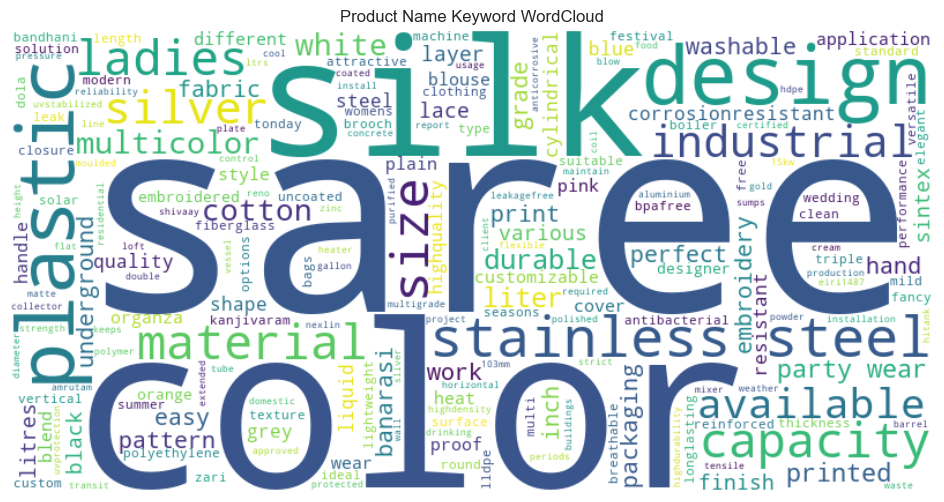

In [32]:
def extract_keywords(name):
    if pd.isnull(name):
        return []
    words = re.findall(r'\w+', name.lower())
    # Ignore very short or very common words
    common = {'the', 'for', 'and', 'with', 'tank', 'tanks', 'water', 'storage'}
    return [w for w in words if len(w) > 3 and w not in common]

if 'product_name_clean' in df.columns:
    all_keywords = df['product_name_clean'].dropna().apply(extract_keywords)
    keywords_flat = [word for words in all_keywords for word in words]
    common_keywords = Counter(keywords_flat).most_common(20)
    print("\nMost common keywords in product names:")
    for kw, count in common_keywords:
        print(f"{kw}: {count}")

    # Optional: Wordcloud
    try:
        from wordcloud import WordCloud
        text = " ".join(keywords_flat)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("Product Name Keyword WordCloud")
        plt.show()
    except ImportError:
        print("Install 'wordcloud' for wordcloud plots: pip install wordcloud")



Most common keywords in product names:
saree: 43
color: 35
silk: 19
steel: 16
plastic: 15
design: 14
stainless: 13
sarees: 13
capacity: 10
material: 10
ladies: 10
silver: 9
industrial: 9
available: 9
wear: 9
multicolor: 9
white: 8
cotton: 8
durable: 7
party: 7


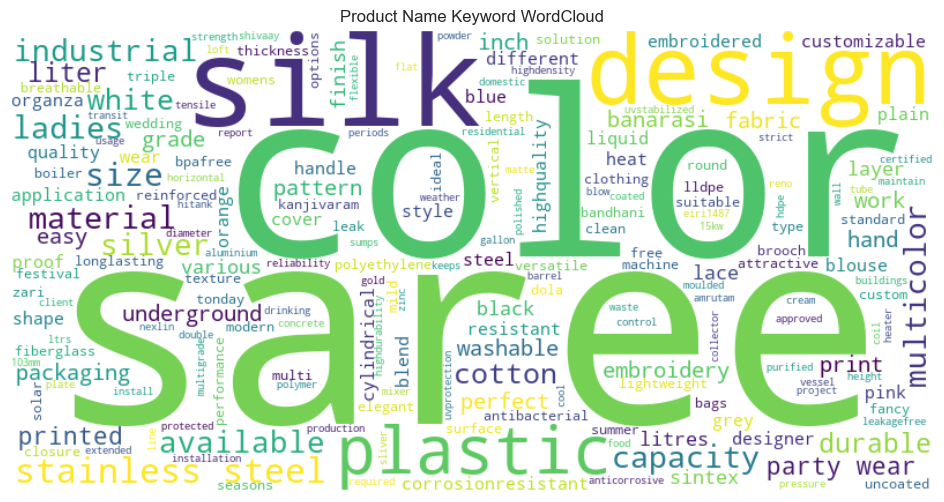

In [33]:
def extract_keywords(name):
    if pd.isnull(name):
        return []
    words = re.findall(r'\w+', name.lower())
    # Ignore very short or very common words
    common = {'the', 'for', 'and', 'with', 'tank', 'tanks', 'water', 'storage'}
    return [w for w in words if len(w) > 3 and w not in common]

if 'product_name_clean' in df.columns:
    all_keywords = df['product_name_clean'].dropna().apply(extract_keywords)
    keywords_flat = [word for words in all_keywords for word in words]
    common_keywords = Counter(keywords_flat).most_common(20)
    print("\nMost common keywords in product names:")
    for kw, count in common_keywords:
        print(f"{kw}: {count}")

    # Optional: Wordcloud
    try:
        from wordcloud import WordCloud
        text = " ".join(keywords_flat)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("Product Name Keyword WordCloud")
        plt.show()
    except ImportError:
        print("Install 'wordcloud' for wordcloud plots: pip install wordcloud")


In [34]:
if 'capacity_liters' in df.columns:
    q1 = df['capacity_liters'].quantile(0.25)
    q3 = df['capacity_liters'].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df['capacity_liters'] < q1 - 1.5*iqr) | (df['capacity_liters'] > q3 + 1.5*iqr)]
    print(f"Capacity outliers (IQR): {outliers.shape[0]}")
    display(outliers[['product_name', 'capacity', 'capacity_liters']])


Capacity outliers (IQR): 2


,product_name,capacity,capacity_liters
10,Industrial Water Storage Tank - Capacity: 5000...,50000 Ltr,50000.0
35,75000 Liter Zinc Aluminium Water Storage Tank ...,75000 Ltr,75000.0
